In [1]:
import sys
sys.path.append('../codes/')

In [2]:
import os
import ast
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from train import load_features, ModelingPipeline

In [4]:
%matplotlib inline

plt.rcParams['savefig.dpi'] = 200
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 10, 6

In [5]:
INPUT_DIR = "../processed_data/supervised_learning/"
OUTPUT_DIR = "../evaluations/best models/evals/"

In [6]:
best = pd.read_csv("../evaluations/best models/BestModels.csv")
best

,Batch,Model Name,Hyperparameters,Training Time (s),Testing Time (s),Accuracy at 10%,Precision at 10%,Recall at 10%,F1 at 10%,ROC AUC
0,0,Bagging,"{'n_estimators': 100, 'max_samples': 0.05, 'ma...",0.2104,0.0220,0.3655,1.0000,0.1354,0.2386,0.6506
1,0,Bagging,"{'n_estimators': 500, 'max_samples': 0.1, 'max...",1.0741,0.0818,0.3655,1.0000,0.1354,0.2386,0.6643
2,1,Random Forest,"{'n_estimators': 100, 'max_depth': 10, 'max_fe...",0.2733,0.1037,0.3711,1.0000,0.1365,0.2402,0.7057
3,2,Random Forest,"{'n_estimators': 300, 'max_depth': 15, 'max_fe...",0.6453,0.1048,0.3444,0.9829,0.1304,0.2303,0.7002
4,3,Random Forest,"{'n_estimators': 100, 'max_depth': 10, 'max_fe...",0.1845,0.1048,0.3639,0.9959,0.1355,0.2385,0.7055
5,4,KNN,"{'n_neighbors': 100, 'weights': 'uniform', 'me...",0.0708,0.3670,0.3754,0.9961,0.1375,0.2417,0.6908
6,4,KNN,"{'n_neighbors': 100, 'weights': 'uniform', 'me...",0.0708,0.3341,0.3754,0.9961,0.1375,0.2417,0.6908


In [10]:
args_dict = {'ask_user': False,
             'verbose': 1,
             'plot': False}

In [13]:
for batch, sub_dir in enumerate(next(os.walk(INPUT_DIR))[1]):
    dir_path = INPUT_DIR + "{}/".format(sub_dir)
    data = load_features(dir_path, labeled_test=True)
    train_pipe = ModelingPipeline(data, batch, cv=3, **args_dict)

    for name, hyp in best[["Model Name", "Hyperparameters"]].values:
        model_index = ModelingPipeline.MODEL_NAMES.index(name)
        hyp = ast.literal_eval(hyp)
        train_pipe.eval_best(model_index, hyp, OUTPUT_DIR, name + "-".join([str(x) for x in hyp.values()]) + ".csv")

##----------------------------------------------------------------------------------------------------------------------------------------------------------------##
<BATCH 0; Pipeline Setup>
Config: 3-Fold Cross-Validation;
Do NOT Ask User for Model and Metrics;
Level of Verbosity: 1; 
Do NOT Include Plots for Evaluations
	Finished reading processed data.
	3-fold cross-validation generator set up with random seed '123'.
##----------------------------------------------------------------------------------------------------------------------------------------------------------------##


##----------------------------------------------------------------------------------------------------------------------------------------------------------------##
<BATCH 0; Model Configured. Bagging.>
##----------------------------------------------------------------------------------------------------------------------------------------------------------------##


##-------------------------------------

<BATCH 2; Model Configured. Random Forest.>
##----------------------------------------------------------------------------------------------------------------------------------------------------------------##


##----------------------------------------------------------------------------------------------------------------------------------------------------------------##
<BATCH 2; Model Configured. KNN.>
##----------------------------------------------------------------------------------------------------------------------------------------------------------------##


##----------------------------------------------------------------------------------------------------------------------------------------------------------------##
<BATCH 2; Model Configured. KNN.>
##----------------------------------------------------------------------------------------------------------------------------------------------------------------##
<BATCH 3; Pipeline Setup>
Config: 3-Fold Cross-Validation;


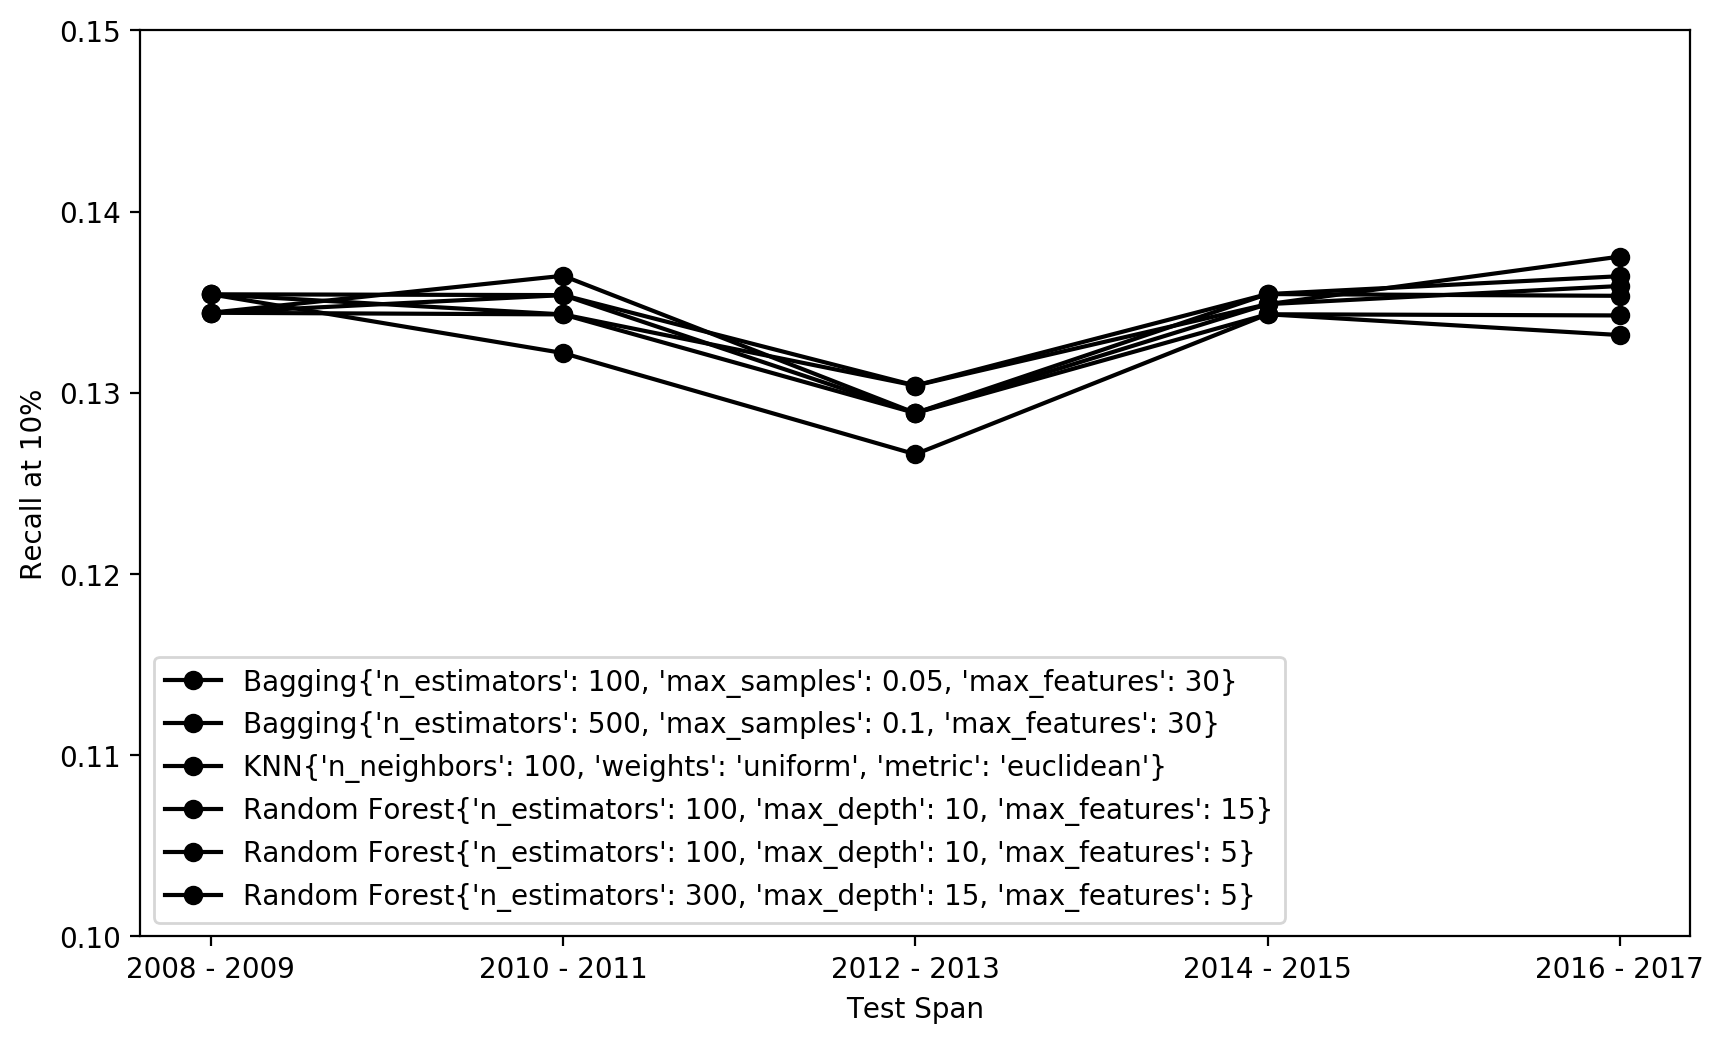

In [8]:
for file in os.listdir(OUTPUT_DIR):
    if file.endswith("_plot.csv"):
        data = pd.read_csv(OUTPUT_DIR + file)
        plt.plot(data.Batch, data.Recall, 'ko-', label=data.Legend[0])
        
plt.xlabel('Test Span')
plt.ylabel('Recall at 10%')
plt.ylim(0.1, 0.15)
plt.legend()
plt.savefig(OUTPUT_DIR + 'recommended_model.png')

In [11]:
for batch, sub_dir in enumerate(next(os.walk(INPUT_DIR))[1]):
    dir_path = INPUT_DIR + "{}/".format(sub_dir)
    data = load_features(dir_path, labeled_test=True)
    train_pipe = ModelingPipeline(data, batch, cv=3, **args_dict)
    
    idx, labels = train_pipe.label(2, {'n_estimators': 100, 'max_depth': 10, 'max_features': 15})
    test = pd.read_csv("../data/train test sets/Batch %s/test.csv" % train_pipe.batch)
    
    dir_path = "../evaluations/best models/predictions/"

    ordered = test.iloc[idx]
    ordered['predicted'] = pd.Series(labels, index=idx)
    ordered.to_csv(dir_path + ("labelled_test_sets/Batch %s.csv" % train_pipe.batch), index=False)
    
    intervention_list = ordered[ordered.predicted == 1]
    intervention_list.drop("predicted", axis=1, inplace=True)
    intervention_list.to_csv(dir_path + ("invervention_lists/Batch %s.csv" % train_pipe.batch))

##----------------------------------------------------------------------------------------------------------------------------------------------------------------##
<BATCH 0; Pipeline Setup>
Config: 3-Fold Cross-Validation;
Do NOT Ask User for Model and Metrics;
Level of Verbosity: 1; 
Do NOT Include Plots for Evaluations
	Finished reading processed data.
	3-fold cross-validation generator set up with random seed '123'.
##----------------------------------------------------------------------------------------------------------------------------------------------------------------##


##----------------------------------------------------------------------------------------------------------------------------------------------------------------##
<BATCH 0; Model Configured. Random Forest.>
##----------------------------------------------------------------------------------------------------------------------------------------------------------------##
<BATCH 1; Pipeline Setup>
Config: 3